In [33]:

#carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt



In [34]:
# se lee el archivo a analizar
df_purchasesfinal = pd.read_csv("DataSet/PurchasesFINAL12312016.csv")


In [35]:
#se muestran las primeras 5 filas para comprobar la carga de datos y hacer un primer análisis
df_purchasesfinal.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [36]:
#Verificación de la cantidad de filas y columnas
np.shape(df_purchasesfinal)

(2372474, 16)

In [37]:
# Verificar si hay filas duplicadas
duplicated_rows = df_purchasesfinal.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print(df_purchasesfinal[duplicated_rows])


Número de filas duplicadas: 0


In [38]:

# Agrupar por Brand y listar los proveedores únicos para cada Brand
brand_vendor_groups = df_purchasesfinal.groupby('Brand')['VendorNumber'].unique().reset_index()

# Filtrar Brands que tienen más de un proveedor asociado
brands_with_multiple_vendors = brand_vendor_groups[brand_vendor_groups['VendorNumber'].apply(len) > 1]

# Mostrar los resultados
print("Brands con múltiples proveedores:")
print(brands_with_multiple_vendors)

# Si deseas ver el detalle de los proveedores para estos Brands
brands_with_multiple_vendors_detail = df_purchasesfinal[df_purchasesfinal['Brand'].isin(brands_with_multiple_vendors['Brand'])]
print("Detalle de Brands con múltiples proveedores:")
print(brands_with_multiple_vendors_detail)


Brands con múltiples proveedores:
       Brand   VendorNumber
324      809   [1128, 8004]
924     2158   [3089, 6830]
974     2232   [4425, 9165]
1221    2717   [4425, 7153]
1335    2879   [4425, 9165]
2388    5075   [1128, 8004]
2444    5197   [1128, 8004]
2472    5270   [1128, 8004]
2473    5273   [1128, 8004]
2481    5296   [1128, 8004]
2482    5297   [1128, 8004]
2483    5298   [1128, 8004]
2484    5299   [1128, 8004]
2492    5322   [4692, 8004]
2542    5434   [1128, 8004]
2925    6692  [9744, 10754]
2986    6942   [1128, 8004]
3682   11089  [9744, 10754]
3712   11259  [9744, 10754]
5045   17754  [4425, 10754]
5332   18771   [4425, 9165]
6433   21860   [7153, 9552]
6442   21959   [7153, 9552]
6443   21960   [7153, 9552]
8672   26889  [9744, 10754]
9191   31384   [4425, 9552]
10165  42735  [4425, 10754]
10178  42801   [4425, 9552]
10662  90609    [2, 201359]
Detalle de Brands con múltiples proveedores:
                InventoryId  Store  Brand               Description   Size  \
464

In [39]:
#Se verifica el tipo de dato de cada columna
print(df_purchasesfinal.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [40]:
# Al observar que hay fechas, se procede a asegurar que tengan el tipo correcto
# Convertir el formato de las columnas PODate, ReceivingDate, InvoiceDate, PayDATE a datetime utilizando .loc

# Lista de las columnas a convertir
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Convertir las columnas a formato datetime usando .loc
for col in date_columns:
    df_purchasesfinal.loc[:, col] = pd.to_datetime(df_purchasesfinal.loc[:, col], errors='coerce')

# Ver el resultado
print(df_purchasesfinal.dtypes)  # Para verificar que las columnas han sido convertidas correctamente


InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [41]:
#Verificamos la cantidad de datos faltantes por columna

print(df_purchasesfinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [42]:
# Al observar que en Size hay 3 valores nulos, se filtran las filas donde la columna 'Size' tiene valores nulos
null_size_rows = df_purchasesfinal[df_purchasesfinal['Size'].isnull()]

# Mostrar las filas con valores nulos en la columna 'Size'
print(null_size_rows)

                 InventoryId  Store  Brand                 Description Size  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN   

         VendorNumber                   VendorName  PONumber  \
1109668         12546  JIM BEAM BRANDS COMPANY         10938   
1112426         12546  JIM BEAM BRANDS COMPANY         10938   
1116302          9552  M S WALKER INC                  10972   

                      PODate        ReceivingDate          InvoiceDate  \
1109668  2016-06-27 00:00:00  2016-07-04 00:00:00  2016-07-13 00:00:00   
1112426  2016-06-27 00:00:00  2016-07-09 00:00:00  2016-07-13 00:00:00   
1116302  2016-06-29 00:00:00  2016-07-07 00:00:00  2016-07-13 00:00:00   

                     PayDate  PurchasePrice  Quantity  Dollars  Classification  
1109668  2016-08-16 00:00:00           6.93     

Pinnacle Rainbow Sherbet  750 ml   
Skinnygirl Pina Colada  750 ml
Alabaster 07 Tinta de 750 ml

In [43]:
# El cliente envia informacion sobre los Size faltantes
# Reemplazar los valores nulos en la columna 'Size' con '750 mL'
df_purchasesfinal['Size'].fillna('750 mL', inplace=True)

# Verificar los cambios
print(df_purchasesfinal[df_purchasesfinal['Size'] == '750 mL'])


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\544178701.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_purchasesfinal['Size'].fillna('750 mL', inplace=True)


                 InventoryId  Store  Brand                 Description  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro   

           Size  VendorNumber                   VendorName  PONumber  \
1109668  750 mL         12546  JIM BEAM BRANDS COMPANY         10938   
1112426  750 mL         12546  JIM BEAM BRANDS COMPANY         10938   
1116302  750 mL          9552  M S WALKER INC                  10972   

                      PODate        ReceivingDate          InvoiceDate  \
1109668  2016-06-27 00:00:00  2016-07-04 00:00:00  2016-07-13 00:00:00   
1112426  2016-06-27 00:00:00  2016-07-09 00:00:00  2016-07-13 00:00:00   
1116302  2016-06-29 00:00:00  2016-07-07 00:00:00  2016-07-13 00:00:00   

                     PayDate  PurchasePrice  Quantity  Dollars  Classification  
1109668  2016-08-16 00:00:00        

In [44]:
#Nuevamente verificamos la cantidad de datos faltantes por columna

print(df_purchasesfinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [45]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_purchasesfinal.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_purchasesfinal[df_purchasesfinal[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [46]:
#Se analizan las distintas columnas 

for i in df_purchasesfinal.columns:
    print(i)
    print(df_purchasesfinal[i].describe()) #descripcion basica 
    print('--------------------------------------')

InventoryId
count               2372474
unique               245907
top       73_DONCASTER_8068
freq                    180
Name: InventoryId, dtype: object
--------------------------------------
Store
count    2.372474e+06
mean     4.465133e+01
std      2.351245e+01
min      1.000000e+00
25%      2.500000e+01
50%      4.800000e+01
75%      6.700000e+01
max      8.100000e+01
Name: Store, dtype: float64
--------------------------------------
Brand
count    2.372474e+06
mean     1.241864e+04
std      1.255728e+04
min      5.800000e+01
25%      3.639000e+03
50%      6.523000e+03
75%      1.887700e+04
max      9.063100e+04
Name: Brand, dtype: float64
--------------------------------------
Description
count                   2372474
unique                     9652
top       Tito's Handmade Vodka
freq                      16442
Name: Description, dtype: object
--------------------------------------
Size
count     2372474
unique         52
top         750mL
freq      1207700
Name: Size, dtype

C:\Users\danie\AppData\Local\Temp\ipykernel_10156\584271719.py:5: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df_purchasesfinal[i].describe()) #descripcion basica


count                 2372474
unique                    319
top       2016-06-27 00:00:00
freq                    24752
Name: PODate, dtype: object
--------------------------------------
ReceivingDate


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\584271719.py:5: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df_purchasesfinal[i].describe()) #descripcion basica


count                 2372474
unique                    364
top       2016-07-05 00:00:00
freq                    19640
Name: ReceivingDate, dtype: object
--------------------------------------
InvoiceDate


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\584271719.py:5: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df_purchasesfinal[i].describe()) #descripcion basica


count                 2372474
unique                    373
top       2016-08-16 00:00:00
freq                    29989
Name: InvoiceDate, dtype: object
--------------------------------------
PayDate


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\584271719.py:5: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df_purchasesfinal[i].describe()) #descripcion basica


count                 2372474
unique                    382
top       2016-09-10 00:00:00
freq                    19713
Name: PayDate, dtype: object
--------------------------------------
PurchasePrice
count    2.372474e+06
mean     1.205005e+01
std      1.794510e+01
min      0.000000e+00
25%      6.120000e+00
50%      9.220000e+00
75%      1.449000e+01
max      5.681810e+03
Name: PurchasePrice, dtype: float64
--------------------------------------
Quantity
count    2.372474e+06
mean     1.415585e+01
std      2.344616e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.200000e+01
max      3.816000e+03
Name: Quantity, dtype: float64
--------------------------------------
Dollars
count    2.372474e+06
mean     1.356815e+02
std      2.816649e+02
min      0.000000e+00
25%      4.926000e+01
50%      8.393000e+01
75%      1.405200e+02
max      5.017570e+04
Name: Dollars, dtype: float64
--------------------------------------
Classification
count    2.372474e+06
me

**InventoryID no puede ser una PK ya que se repite en varias oportunidades** 

count               2372474
unique               245907


**Description**

top       Tito's Handmade Vodka
freq                      16442


**VendorName**

top       DIAGEO NORTH AMERICA INC   
freq                           243326

In [47]:
# Contar la cantidad de pedidos por tienda
pedidos_por_tienda = df_purchasesfinal['Store'].value_counts().reset_index()
pedidos_por_tienda.columns = ['Tienda', 'Cantidad de Pedidos']

# Seleccionar las 10 tiendas con mayor cantidad de pedidos
top_tiendas = pedidos_por_tienda.head(10)

# Mostrar la tabla de las 10 tiendas con mayor cantidad de pedidos
print("Top 9 Tiendas con Mayor Cantidad de Pedidos:")
print(top_tiendas)



Top 9 Tiendas con Mayor Cantidad de Pedidos:
   Tienda  Cantidad de Pedidos
0      76               121123
1      73                96794
2      38                93412
3      34                92113
4      66                82699
5      67                69419
6      50                65512
7      69                63683
8      60                58169
9      41                53344


In [48]:
# Analizar si las ordenes tienes distintas fechas de entrega
# Agrupar por PONumber y contar las fechas de entrega únicas para cada orden
po_receiving_dates = df_purchasesfinal.groupby('PONumber')['ReceivingDate'].nunique().reset_index()

# Filtrar órdenes que tienen más de una fecha de entrega
multiple_receiving_dates = po_receiving_dates[po_receiving_dates['ReceivingDate'] > 1]

# Mostrar los resultados
print("Órdenes con múltiples fechas de entrega:")
print(multiple_receiving_dates)

# Si deseas ver el detalle de estas órdenes
orders_with_multiple_receiving_dates_detail = df_purchasesfinal[df_purchasesfinal['PONumber'].isin(multiple_receiving_dates['PONumber'])]
print("Detalle de órdenes con múltiples fechas de entrega:")
print(orders_with_multiple_receiving_dates_detail)


Órdenes con múltiples fechas de entrega:
      PONumber  ReceivingDate
0         8106              3
1         8107              2
2         8108              3
3         8109              3
4         8110              3
...        ...            ...
5538     13657              6
5539     13658              6
5540     13659              5
5541     13660              4
5542     13661              6

[5000 rows x 2 columns]
Detalle de órdenes con múltiples fechas de entrega:
                  InventoryId  Store  Brand                   Description  \
1            30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide   
2           34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced   
3         1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide   
5               5_SUTTON_3348      5   3348           Bombay Sapphire Gin   
6         1_HARDERSFIELD_8358      1   8358             Bacardi 151 Proof   
...                       ...    ...    ...                 

Top 10 Productos Más Comprados:
   Brand                   Description  PurchasePrice  Quantity
0   8111             Smirnoff 80 Proof           0.77    337660
1   1892                    Yukon Jack           0.72    254824
2   5111  Dr McGillicuddy's Mentholmnt           0.72    244654
3   3606      Smirnoff Raspberry Vodka           0.74    226085
4   6570  Kendall Jackson Chard Vt RSV           6.77    215668
5   4261        Capt Morgan Spiced Rum          16.17    201682
6   8068              Absolut 80 Proof          18.24    187407
7   3405         Tito's Handmade Vodka          23.19    164038
8   3837                    Skyy Vodka           0.72    163375
9   3102             Smirnoff Traveler          12.94    161386


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\2501841471.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clasificacion_count.index, y=clasificacion_count.values, palette=colors)
C:\Users\danie\AppData\Local\Temp\ipykernel_10156\2501841471.py:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x=clasificacion_count.index, y=clasificacion_count.values, palette=colors)


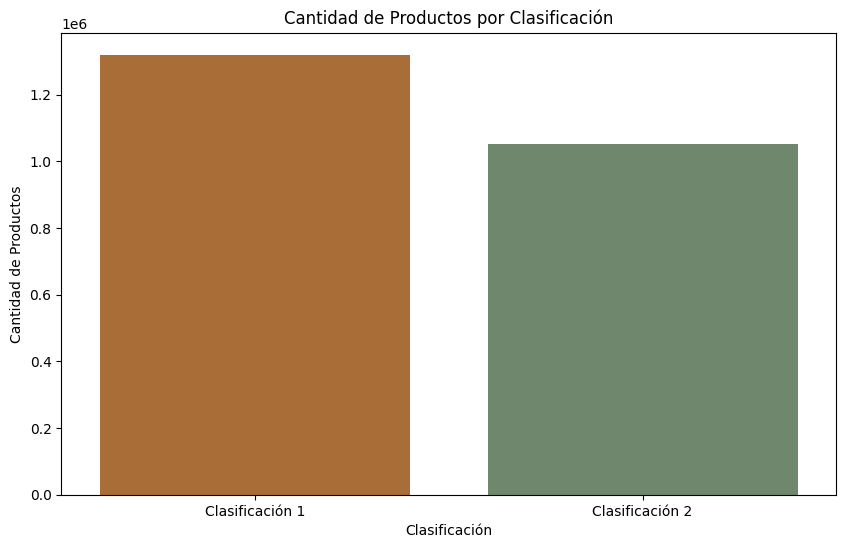

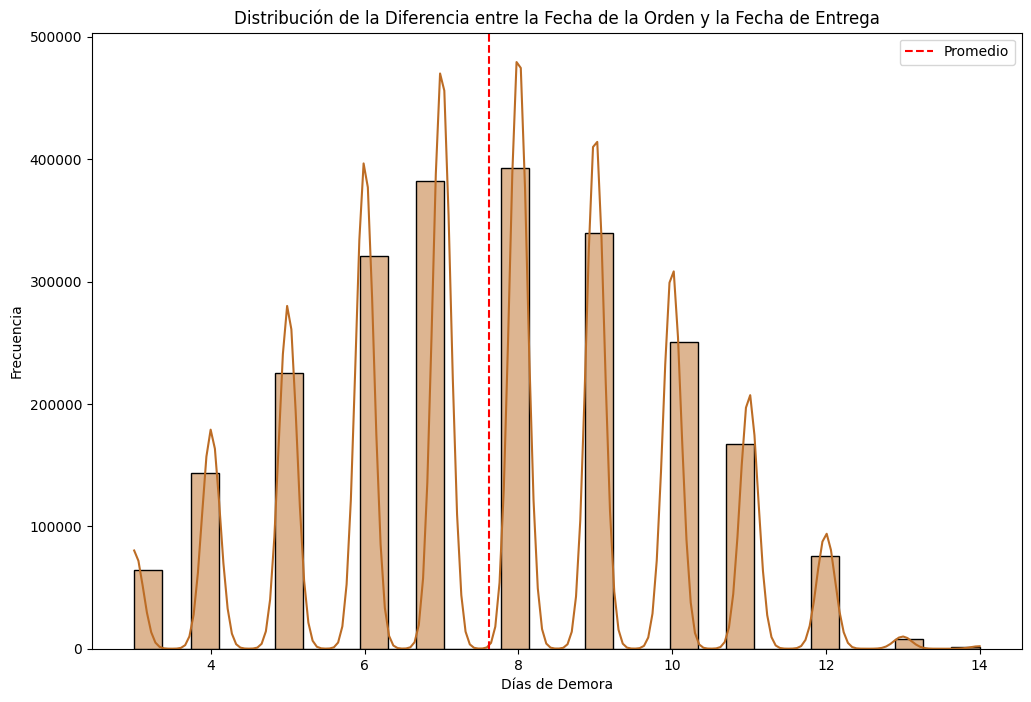

Top 10 Productos Más Costosos:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3   2367            Glenmorangie Pride        4264.70
4   2367            Glenmorangie Pride        4264.70
5    423       Hennessy Richard Cognac        3352.93
6    423       Hennessy Richard Cognac        3352.93
7    423       Hennessy Richard Cognac        3352.93
8   8385  Glenfiddich 1978 Rare Collct        2713.17
9   1251  Port Ellen 32 Yr Single Malt        2661.86

Top 10 Productos Más Costosos:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3   2367            Glenmorangie Pride        4264.70
4   2367            Glenmorangie Pride        4264.70
5    423       Henn

In [49]:
# Se realizan graficos y tablas para mostrar en la primer demo
# Convertir las fechas a formato datetime
df_purchasesfinal['PODate'] = pd.to_datetime(df_purchasesfinal['PODate'])
df_purchasesfinal['ReceivingDate'] = pd.to_datetime(df_purchasesfinal['ReceivingDate'])

# Definir la paleta de colores
colors = ['#BC6C25', '#6B8B68', '#E9D39A', '#EEEEEE', '#B8B789']


# Los 10 productos más comprados (Brand, Descripción y Purchase Price)
top_productos = df_purchasesfinal.groupby(['Brand', 'Description', 'PurchasePrice'])['Quantity'].sum().nlargest(10).reset_index()
print("Top 10 Productos Más Comprados:")
print(top_productos[['Brand', 'Description', 'PurchasePrice', 'Quantity']])

# Gráfico de la cantidad de productos de clasificación 1 y 2
clasificacion_count = df_purchasesfinal['Classification'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=clasificacion_count.index, y=clasificacion_count.values, palette=colors)
plt.title('Cantidad de Productos por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Productos')
plt.xticks([0, 1], ['Clasificación 1', 'Clasificación 2'])
plt.show()

# Comparar la diferencia entre la fecha de la orden y la fecha de entrega
df_purchasesfinal['Diferencia_Dias'] = (df_purchasesfinal['ReceivingDate'] - df_purchasesfinal['PODate']).dt.days
plt.figure(figsize=(12, 8))
sns.histplot(df_purchasesfinal['Diferencia_Dias'], bins=30, kde=True, color=colors[0])
plt.title('Distribución de la Diferencia entre la Fecha de la Orden y la Fecha de Entrega')
plt.xlabel('Días de Demora')
plt.ylabel('Frecuencia')
plt.axvline(df_purchasesfinal['Diferencia_Dias'].mean(), color='red', linestyle='--', label='Promedio')
plt.legend()
plt.show()

# Top 10 Productos Más Costosos (Brand, Descripción y Purchase Price)
top_costosos = df_purchasesfinal[['Brand', 'Description', 'PurchasePrice']].nlargest(10, 'PurchasePrice').reset_index(drop=True)
print("Top 10 Productos Más Costosos:")
print(top_costosos)

# Tabla de los 10 productos más costosos
top_costosos_table = top_costosos[['Brand', 'Description', 'PurchasePrice']]
print("\nTop 10 Productos Más Costosos:")
print(top_costosos_table)


In [50]:
# Se analizan las columnas que son fechas
# Lista de columnas de interés
columns_of_interest = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Valor mínimo: {df[column].min()}")
    print(f"Valor máximo: {df[column].max()}")

# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in columns_of_interest:
    print_column_stats(df_purchasesfinal, column)



Estadísticas para la columna 'PODate':
Número total de valores (incluyendo nulos): 2372474
Número total de valores: 2372474
Valor mínimo: 2015-12-20 00:00:00
Valor máximo: 2016-12-23 00:00:00

Estadísticas para la columna 'ReceivingDate':
Número total de valores (incluyendo nulos): 2372474
Número total de valores: 2372474
Valor mínimo: 2016-01-01 00:00:00
Valor máximo: 2016-12-31 00:00:00

Estadísticas para la columna 'InvoiceDate':
Número total de valores (incluyendo nulos): 2372474


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\3956009326.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Número total de valores: 2372474
Valor mínimo: 2016-01-04 00:00:00
Valor máximo: 2017-01-10 00:00:00

Estadísticas para la columna 'PayDate':
Número total de valores (incluyendo nulos): 2372474


C:\Users\danie\AppData\Local\Temp\ipykernel_10156\3956009326.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Número total de valores: 2372474
Valor mínimo: 2016-02-04 00:00:00
Valor máximo: 2017-02-19 00:00:00


PODate desde el 2015-12-20 al 2016-12-23

ReceivingDate 2016-01-01 al 2016-12-31

Las fechas de recepción de los productos abarcan todo el año 2016. No hay recepciones registradas antes de 2016 ni después de 2016, lo que sugiere que las órdenes de compra realizadas a finales de 2015 fueron recibidas en 2016.

InvoiceDate 2016-01-04 al 2017-01-10

Las facturas comenzaron a generarse poco después de que empezaron las recepciones en enero de 2016 y continuaron hasta principios de 2017. Esto indica que hay un ligero retraso entre la recepción y la facturación, y que algunas órdenes recibidas a finales de 2016 se facturaron en enero de 2017.

PayDate 2016-02-04 al 2017-02-19

Los pagos comenzaron aproximadamente un mes después de las primeras facturas y se extendieron hasta febrero de 2017. Esto muestra que el proceso de pago tiene un lapso adicional después de la facturación, lo cual es común en muchos procesos de cuentas por pagar donde hay términos de crédito.<



In [51]:
# Se analizan las columnas con tipo de datos flotantes
# Lista de columnas de tipo flotante
columns_of_interest = ['Store', 'Brand', 'VendorNumber', 'PONumber', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in columns_of_interest:
    print_column_stats(df_purchasesfinal, column)



Estadísticas para la columna 'Store':
Número total de valores (incluyendo nulos): 2372474
Número total de valores: 2372474.0
Número de valores únicos: 80
Valor más frecuente (top): 76
Frecuencia del valor más frecuente (freq): 121123
Valor mínimo: 1.0
Valor máximo: 81.0
Media: 44.65132768578286

Estadísticas para la columna 'Brand':
Número total de valores (incluyendo nulos): 2372474
Número total de valores: 2372474.0
Número de valores únicos: 10664
Valor más frecuente (top): 8068
Frecuencia del valor más frecuente (freq): 7359
Valor mínimo: 58.0
Valor máximo: 90631.0
Media: 12418.641109660211

Estadísticas para la columna 'VendorNumber':
Número total de valores (incluyendo nulos): 2372474
Número total de valores: 2372474.0
Número de valores únicos: 126
Valor más frecuente (top): 3960
Frecuencia del valor más frecuente (freq): 243326
Valor mínimo: 2.0
Valor máximo: 201359.0
Media: 6886.4355331185925

Estadísticas para la columna 'PONumber':
Número total de valores (incluyendo nulos): 

1. Store:

La columna Store muestra que hay 80 tiendas únicas, con la tienda 76 siendo la más frecuente. 

2. Brand:

La columna Brand tiene una amplia variedad de marcas (10,664 únicas). La marca 8068 es la más frecuente, aunque con una frecuencia relativamente baja (7,359), lo que indica una distribución dispersa entre muchas marcas.

3. VendorNumber:

Hay 126 proveedores únicos, con el proveedor 3960 siendo el más frecuente. La amplia variación en los números de proveedores y la alta frecuencia del proveedor más común (243,326) sugiere que unos pocos proveedores manejan la mayoría de las transacciones.

4. PONumber:

Existen 5,543 órdenes de compra únicas, con la orden 10936 siendo la más común. 

5. PurchasePrice:

La mayoría de los precios de compra están concentrados en niveles bajos, con una media de 12.05, y un valor más frecuente de 5.84, sugiriendo una distribución con muchos valores pequeños y algunos valores atípicos altos.

6. Quantity:

La cantidad más común es 12, con una frecuencia notablemente alta (627,805), indicando una posible unidad de pedido estándar. La media cercana a 14 sugiere que la mayoría de las órdenes son de tamaño pequeño a moderado.

7. Dollars:

Los valores en dólares están dispersos con 33,567 valores únicos. La media de 135.68 y un valor más frecuente de 39.96 indican que, aunque la mayoría de las transacciones son de valores bajos, existen transacciones significativas de mayor valor.

8. Classification:

La clasificación tiene solo dos valores únicos, con la mayoría de los registros clasificados como 1. La alta frecuencia de 1 sugiere una categorización predominante, con pocas transacciones clasificadas como 2.

**Implicaciones y Áreas de Mejora**
Gestión de Inventarios:

Acción: Identificar productos con precios de compra extremadamente altos o bajos y analizar la razón detrás de estas variaciones. Esto puede ayudar a optimizar el stock y negociar mejores precios.
Tecnología: Utilizar herramientas de análisis de datos para monitorear continuamente las variaciones de precios y ajustar las políticas de inventario.

Relaciones con Proveedores:

Acción: Analizar la distribución de los proveedores para entender mejor la dependencia de unos pocos proveedores grandes. Se pueden buscar nuevos proveedores para diversificar el riesgo.
Tecnología: Implementar sistemas de gestión de relaciones con proveedores (SRM) para evaluar el desempeño y gestionar las relaciones de manera más efectiva.

Optimización de Costos:

Acción: Revisar las transacciones con montos en dólares extremadamente altos para asegurar que se está obteniendo el mejor valor por el dinero gastado.
Tecnología: Utilizar sistemas de análisis financiero para detectar y revisar outliers en las transacciones de manera regular.

In [52]:
# Se observa que hay columnas con PurchasePrice=0
# Contar el número de celdas con precio igual a 0 en la columna 'PurchasePrice'
zero_price_count = (df_purchasesfinal['PurchasePrice'] == 0).sum()

# Mostrar el resultado
print(f"Número de celdas con precio igual a 0 en 'PurchasePrice': {zero_price_count}")


Número de celdas con precio igual a 0 en 'PurchasePrice': 153


In [53]:
# Filtrar las filas donde 'PurchasePrice' es igual a 0
zero_price_rows = df_purchasesfinal[df_purchasesfinal['PurchasePrice'] == 0]

# Mostrar las filas filtradas
print(zero_price_rows)



                   InventoryId  Store  Brand                  Description  \
1369009    59_CLAETHORPES_2166     59   2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34   2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44   2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56   2166  The Macallan Double Cask 12   
...                        ...    ...    ...                          ...   
2278896     39_EASTHALLOW_2166     39   2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9   2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20   2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31   2166  The Macallan Double Cask 12   

          Size  VendorNumber                   VendorName  PONumber  \
1369

In [54]:
# Filtrar las filas donde 'PurchasePrice' es igual a 0
zero_price_rows = df_purchasesfinal[df_purchasesfinal['PurchasePrice'] == 0]

# Verificar si son el mismo producto basándonos en columnas como 'Description', 'Brand' y 'VendorNumber'
# Puedes ajustar las columnas según tus necesidades
grouped = zero_price_rows.groupby(['Description', 'Brand', 'VendorNumber']).size().reset_index(name='count')

# Mostrar las filas agrupadas
print(grouped)



                   Description  Brand  VendorNumber  count
0  The Macallan Double Cask 12   2166          2561    153


In [55]:
# Se le pide al cliente el PurchasePrice de "The Macallan Double Cask 12" para agregarlo en el data set
# Verificar las filas que contienen "The Macallan Double Cask 12" en la columna Description
macallan_rows = df_purchasesfinal[df_purchasesfinal['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas antes de la actualización:")
print(macallan_rows)

# Actualizar el valor de PurchasePrice a 50 para "The Macallan Double Cask 12"
df_purchasesfinal.loc[df_purchasesfinal['Description'].str.contains("The Macallan Double Cask 12", na=False), 'PurchasePrice'] = 50

# Verificar las filas que contienen "The Macallan Double Cask 12" después de la actualización
macallan_rows_updated = df_purchasesfinal[df_purchasesfinal['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas después de la actualización:")
print(macallan_rows_updated)



Filas antes de la actualización:
                   InventoryId  Store  Brand                  Description  \
1369009    59_CLAETHORPES_2166     59   2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34   2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44   2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56   2166  The Macallan Double Cask 12   
...                        ...    ...    ...                          ...   
2278896     39_EASTHALLOW_2166     39   2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9   2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20   2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31   2166  The Macallan Double Cask 12   

          Size  VendorNumber             

In [56]:
#Se analiza si hay productos que tienen mas de un proveedor 
#  Agrupar por producto (ej. 'Description' y 'Brand') y contar los proveedores únicos (VendorNumber)
product_vendor_count = df_purchasesfinal.groupby(['Description', 'Brand'])['VendorNumber'].nunique().reset_index()

# Renombrar la columna para claridad
product_vendor_count.columns = ['Description', 'Brand', 'UniqueVendorCount']

# Filtrar productos que tienen más de un proveedor
multiple_vendors = product_vendor_count[product_vendor_count['UniqueVendorCount'] > 1]

# Mostrar los productos con más de un proveedor
print(multiple_vendors)


                        Description  Brand  UniqueVendorCount
941    Benton Lane Pnt Gris Willamt  42801                  2
942          Benton Lane Pnt Nr Ore  31384                  2
1030                Big Peat Scotch   2717                  2
2594             Chocolate Shop Red  17754                  2
2628   Cigar Zin Old Vine Zinfandel  18771                  2
2911       Corner Creek Rsv Bourbon   2879                  2
4049   Flavor Essence Variety 5 Pak  90609                  2
5168    Jaboulet Cotes du Rhone Par   6692                  2
5170   Jaboulet Crozes Herm 10 Thal  11259                  2
5171    Jaboulet Crozes Hermitage L  26889                  2
5172   Jaboulet Cts Rhone Parl Rose  11089                  2
6022        Le Grande Courtage Brut  21860                  2
6023        Le Grande Courtage Brut  21959                  2
6025        Le Grande Courtage Rose  21960                  2
6139                  Linie Aquavit   5322                  2
6384   M

In [57]:
#Se analiza si los productos que tienen mas de un proveedor tienen los mismos precios
# Agrupar por producto (ej. 'Description' y 'Brand') y contar los proveedores únicos (VendorNumber)
product_vendor_count = df_purchasesfinal.groupby(['Description', 'Brand'])['VendorNumber'].nunique().reset_index()

# Renombrar la columna para claridad
product_vendor_count.columns = ['Description', 'Brand', 'UniqueVendorCount']

# Filtrar productos que tienen más de dos proveedores
more_than_two_vendors = product_vendor_count[product_vendor_count['UniqueVendorCount'] >= 2]

# Obtener los precios de los productos que tienen más de dos proveedores
merged_df = pd.merge(df_purchasesfinal, more_than_two_vendors[['Description', 'Brand']], on=['Description', 'Brand'], how='inner')

# Mostrar los productos con más de un proveedor y sus precios
print("Productos con más de un proveedor y sus precios:")
print(merged_df[['Description', 'Brand', 'VendorNumber', 'PurchasePrice']])

# Comparar precios para cada producto
comparison = merged_df.groupby(['Description', 'Brand'])['PurchasePrice'].nunique().reset_index()
comparison.columns = ['Description', 'Brand', 'UniquePriceCount']

# Mostrar los productos con precios diferentes entre proveedores
different_prices = comparison[comparison['UniquePriceCount'] > 1]
print("\nProductos con precios diferentes entre proveedores:")
print(different_prices)

# Mostrar los productos con precios iguales entre proveedores
same_prices = comparison[comparison['UniquePriceCount'] == 1]
print("\nProductos con precios iguales entre proveedores:")
print(same_prices)




Productos con más de un proveedor y sus precios:
                   Description  Brand  VendorNumber  PurchasePrice
0        Tuaca Italian Liqueur   5075          1128          15.03
1             Southern Comfort   5299          1128          15.26
2             Southern Comfort   5299          1128          15.26
3             Southern Comfort   5297          1128          10.76
4             Southern Comfort   5299          1128          15.26
...                        ...    ...           ...            ...
9421  Corner Creek Rsv Bourbon   2879          9165          22.21
9422              Sipsmith Gin   2232          9165          31.00
9423              Sipsmith Gin   2232          9165          31.00
9424              Sipsmith Gin   2232          9165          31.00
9425  Corner Creek Rsv Bourbon   2879          9165          22.21

[9426 rows x 4 columns]

Productos con precios diferentes entre proveedores:
Empty DataFrame
Columns: [Description, Brand, UniquePriceCount]
Index

Se crea nueva columna CompraID para que se la PK de la tabla

In [58]:
# Crear la nueva columna Detalle_compraID con valores incrementales comenzando desde 1
df_purchasesfinal['Detalle_compraID'] = range(1, len(df_purchasesfinal) + 1)

df_purchasesfinal.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Diferencia_Dias,Detalle_compraID
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04 00:00:00,2016-02-16 00:00:00,35.71,6,214.26,1,12,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07 00:00:00,2016-02-21 00:00:00,9.35,4,37.40,1,10,2
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07 00:00:00,2016-02-21 00:00:00,9.41,5,47.05,1,11,3
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07 00:00:00,2016-02-21 00:00:00,9.35,6,56.10,1,10,4
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09 00:00:00,2016-02-16 00:00:00,21.32,5,106.60,1,9,5


In [59]:
# Obtener los valores únicos de la columna 'Size'
unique_sizes = df_purchasesfinal['Size'].unique()


# Mostrar los valores únicos de 'Size'
print("Valores únicos de 'Size':")
print(unique_sizes)


# Filtrar las filas donde 'Brand' es 3121, 5678 o 15365
filtered_df = df_purchasesfinal[df_purchasesfinal['Brand'].isin([3121, 5678, 15365])]

# Obtener los valores de 'Size' para estos productos
size_values = filtered_df[['Brand', 'Size']]

# Mostrar los resultados
print("\nValores de 'Size' para los productos con Brand 3121, 5678 y 15365:")
print(size_values)


Valores únicos de 'Size':
['750mL' '1.75L' '200mL' '1.5L' '50mL' 'Liter' '375mL' '100mL'
 '750mL 2 Pk' '3L' '187mL 4 Pk' '250mL 4 Pk' '500mL' '187mL' '100mL 4 Pk'
 '5L' '4L' '375mL 2 Pk' '187mL 3 Pk' '250mL' '180mL' '50mL 5 Pk'
 '200mL 4 Pk' '5.0 Oz' '18L' '300mL' '720mL' '50mL 3 Pk' '50mL 4 Pk'
 '330mL' '750mL 3 Pk' '3/100mL' '750mL + 2/' '750mL 4 Pk' '200mL 3 Pk'
 '375mL 3 Pk' '50mL 12 Pk' '22.0 Oz' '750mL + 3/' '200mL 5 Pk'
 '750mL + 1/' '5/2 oz' '6L' '20L' '400mL' '750 mL' '25.0' '187mL 2 Pk'
 '19.5L' '750mL 6 Pk' '9L' '128.0 Gal']

Valores de 'Size' para los productos con Brand 3121, 5678 y 15365:
         Brand    Size
26472     5678   750mL
134447    3121   750mL
135201    3121   750mL
135202    3121   750mL
176514    5678   750mL
214731    5678   750mL
214955    3121   750mL
215283    3121   750mL
291013    3121   750mL
366401    5678   750mL
366882    5678   750mL
367931    5678   750mL
406165    3121   750mL
478946    3121   750mL
631595    5678   750mL
760082    5678   750mL

In [60]:


# Obtener las filas únicas basadas en la columna 'Brand'
unique_brands = df_purchasesfinal.drop_duplicates(subset=['Brand'])

# Mostrar los resultados
print(unique_brands)


                InventoryId  Store  Brand                   Description  \
0         69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno   
1          30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide   
2         34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced   
4         76_DONCASTER_2034     76   2034     Glendalough Double Barrel   
5             5_SUTTON_3348      5   3348           Bombay Sapphire Gin   
...                     ...    ...    ...                           ...   
2366525   69_MOUNTMEND_1069     69   1069  Spade&Bushel 10yr Irish Wsky   
2366622   61_AETHELNEY_1274     61   1274                No. 14 Bourbon   
2366623   73_DONCASTER_1073     73   1073             Straw Boys Poitin   
2366658   69_MOUNTMEND_1071     69   1071              Straw Boys Vodka   
2366863  69_MOUNTMEND_27051     69  27051     Killibinbin Sneaky Shiraz   

          Size  VendorNumber                   VendorName  PONumber  \
0        750mL           105

In [61]:

# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'InventoryId': 'InventarioID',
    'Store': 'TiendaID',
    'Brand': 'ProductoID',
    'Description': 'Descripcion',
    'Size': 'Tamaño',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Proveedor',
    'PONumber': 'CompraID',
    'PODate': 'Fecha_orden',
    'ReceivingDate': 'Fecha_entrega',
    'InvoiceDate': 'Fecha_facturacion',
    'PayDate': 'Fecha_pago',
    'PurchasePrice': 'Precio_compra',
    'Quantity': 'Cantidad',
    'Dollars': 'Precio_total',
    'Classification': 'Clasificacion',
    'Detalle_compraID': 'Detalle_compraID'
}

# Renombrar las columnas
df_purchasesfinal.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_purchasesfinal.head())


          InventarioID  TiendaID  ProductoID                   Descripcion  \
0    69_MOUNTMEND_8412        69        8412     Tequila Ocho Plata Fresno   
1     30_CULCHETH_5255        30        5255  TGI Fridays Ultimte Mudslide   
2    34_PITMERDEN_5215        34        5215  TGI Fridays Long Island Iced   
3  1_HARDERSFIELD_5255         1        5255  TGI Fridays Ultimte Mudslide   
4    76_DONCASTER_2034        76        2034     Glendalough Double Barrel   

  Tamaño  ProveedorID                    Proveedor  CompraID Fecha_orden  \
0  750mL          105  ALTAMAR BRANDS LLC               8124  2015-12-21   
1  1.75L         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
2  1.75L         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
3  1.75L         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
4  750mL          388  ATLANTIC IMPORTING COMPANY       8169  2015-12-24   

  Fecha_entrega    Fecha_facturacion           Fecha_pago  Precio_compra  

In [62]:
#crear el nuevo archivo con las tablas finales
# Seleccionar las columnas deseadas
df_purchasesfinal_final = df_purchasesfinal[['Detalle_compraID', 'TiendaID', 'ProductoID', 'CompraID', 'Fecha_entrega', 'Precio_compra', 'Cantidad']]



In [63]:
# Guardar el resultado en un archivo CSV para revisarlo
df_purchasesfinal_final.to_csv('DataSetFiltrados/DETALLE_COMPRA.csv', index=False)

In [64]:
df_purchasesfinal_final.head()

,Detalle_compraID,TiendaID,ProductoID,CompraID,Fecha_entrega,Precio_compra,Cantidad
0,1,69,8412,8124,2016-01-02,35.71,6
1,2,30,5255,8137,2016-01-01,9.35,4
2,3,34,5215,8137,2016-01-02,9.41,5
3,4,1,5255,8137,2016-01-01,9.35,6
4,5,76,2034,8169,2016-01-02,21.32,5
